# Libraries

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Initilizing Parameters

In [79]:
p = [0.65, 0.35]
m_01 = np.array([3, 0])
c_01 = np.array([[2, 0], [0, 1]])
m_02 = np.array([0, 3])
c_02 = np.array([[1, 0], [0, 2]])
m_1 = np.array([2, 2])
c_1 = np.array([[1, 0], [0, 1]])
w1 = 0.5
w2 = w1

# Generating Samples
The class priors are $P(L=0)=0.65$ and $P(L=1)=0.35$. The class class-conditional pdfs are $p(\mathbf{x} \mid L=0)=w_{1} g\left(\mathbf{x} \mid \mathbf{m}_{01}, \mathbf{C}_{01}\right)+w_{2} g\left(\mathbf{x} \mid \mathbf{m}_{02}, \mathbf{C}_{02}\right)$ and $p(\mathbf{x} \mid L=1)=g\left(\mathbf{x} \mid \mathbf{m}_{1}, \mathbf{C}_{1}\right)$, where $g(\mathbf{x} \mid \mathbf{m}, \mathbf{C})$ is a multivariate Gaussian probability density function with mean vector $\mathbf{m}$ and covariance matrix C. The parameters of the class-conditional Gaussian pdfs are: $w_{1}=w_{2}=1 / 2$

In [80]:
sample_size = 10000
labels = np.random.choice([0, 1], sample_size, p)
samples = np.zeros((2, sample_size))
for i in range(sample_size):
    if(labels[i]):
        samples[:,i] = (w1 * np.random.multivariate_normal(m_01, c_01) + w2 * np.random.multivariate_normal(m_02, c_02))
    else:
        samples[:,i] = (np.random.multivariate_normal(m_1, c_1))

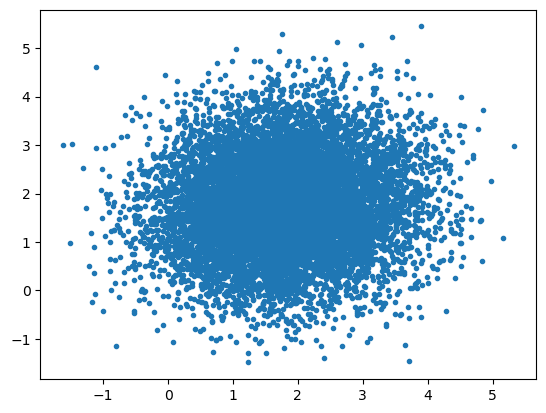

In [81]:
plt.plot(samples[0], samples[1], '.')
plt.show()

# Classifier

In [82]:
def guass_mul_prob(x, m, c):
    return (1/(np.power(2 * np.pi, len(x)/2) * np.linalg.det(c))) * np.exp(-0.5 * np.matmul(np.matmul((x - m).T, np.linalg.inv(c)), x - m))

def classifier(x, threshold, m_01, c_01, m_02, c_02, m_1, c_1):
    likelihood_ratio = guass_mul_prob(x, m_1, c_1) / (w1 * guass_mul_prob(x, m_01, c_01) + w2 * guass_mul_prob(x, m_02, c_02))
    if(likelihood_ratio > threshold):
        return 1
    else:
        return 0


In [83]:

thresholds = np.arange(0, 100, 10)
results = np.zeros(sample_size)
tp = np.zeros(len(thresholds))
fp = np.zeros(len(thresholds))
for t in range(len(thresholds)):
    for i in range(sample_size):
        results[i] = classifier(samples[:,i], thresholds[t], m_01, c_01, m_02, c_02, m_1, c_1)
        tp[t] += (results[i] == labels[i]) and (labels[i] == 1)
        fp[t] += (results[i] != labels[i]) and (labels[i] == 0)


# ROC

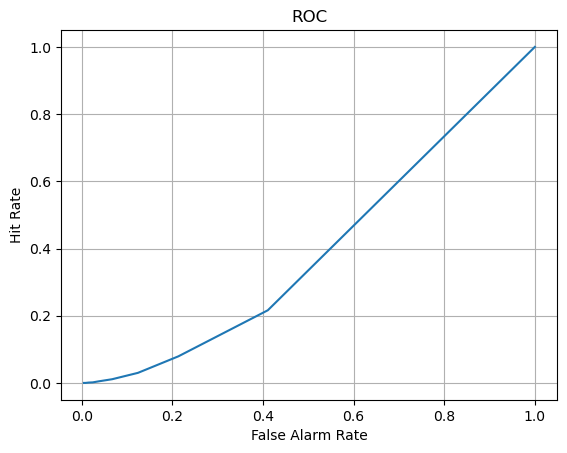

In [87]:
tp_rate = tp / np.sum(labels == 1)
fp_rate = fp / np.sum(labels == 0)
plt.plot(fp_rate, tp_rate)
plt.xlabel('False Alarm Rate')
plt.ylabel('Hit Rate')
plt.title('ROC')
plt.grid()
plt.show()